Variance boxplot saved to: plots\1000_precision_recall_variance_boxplot.png


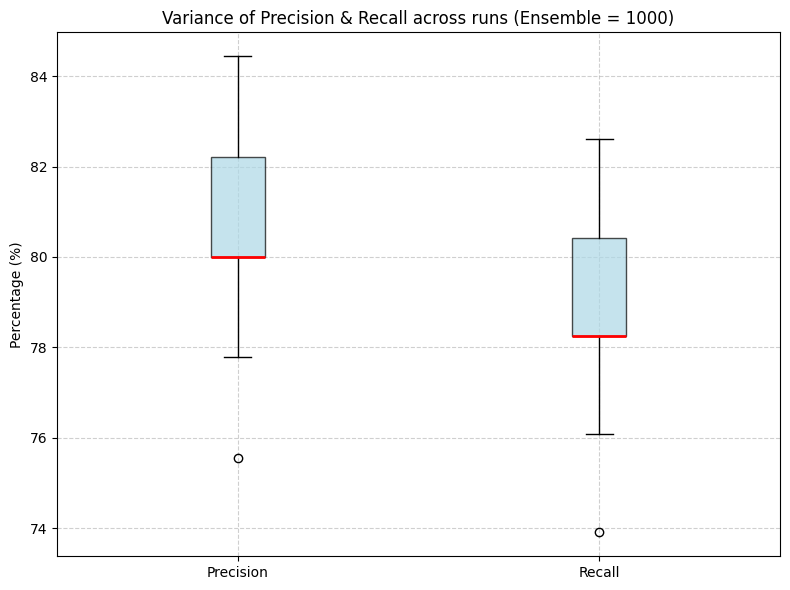

In [7]:
import os
import matplotlib.pyplot as plt

# Folder containing results
folder = 'evaluations/RS_1000'
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall


def plot_variance_boxplot():
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]

    precisions = []
    recalls = []

    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)

    # --- Plot distributions ---
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.boxplot([precisions, recalls], labels=["Precision", "Recall"], patch_artist=True,
               boxprops=dict(facecolor="lightblue", alpha=0.7),
               medianprops=dict(color="red", linewidth=2))

    ax.set_title("Variance of Precision & Recall across runs (Ensemble = 1000)")
    ax.set_ylabel("Percentage (%)")
    ax.grid(True, linestyle="--", alpha=0.6)

    output_path = os.path.join(output_folder, '1000_precision_recall_variance_boxplot.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Variance boxplot saved to: {output_path}")
    plt.show()
    plt.close(fig)


# Run
plot_variance_boxplot()

